In [1]:
# Импортирование библиотек
import pyXfoil as pxf
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
# Инициализация сессии работы с консольным приложением Xfoil

S = pxf.Session()
EXP = pxf.Experiment()

In [3]:
# Список доступных профилей (только профили NACA, которые есть в Атласе)
S.get_available_airfoils()

['NACA2208',
 'NACA2211',
 'NACA2214',
 'NACA2217',
 'NACA2220',
 'NACA23008',
 'NACA23011',
 'NACA23014',
 'NACA23017',
 'NACA23020',
 'NACA0012']

In [4]:
# Список доступных методов расчета критического числа Маха
S.get_available_method_M_kr()

['KHRISTIANOVICH', 'BURAGO', 'KARMAN']

In [5]:
import re
def read_pack(filename):
    file = open(filename)
    values = file.read().split("\n")
    data = []
    
    for key in values:
        value = re.findall(r"[-+]?\d*\.\d+|\d+", key)
    
        if value != []:
            data.append(value)
    data = data[5:]
    float_data = [[float(column) for column in row] for row in data]
    float_data = np.array(float_data)
    return float_data

In [6]:
# Пример единичного расчета Cp и M_кр

AIRFOIL = 'NACA0012' # Имя профиля (имя профиля или файл с координатами профиля)
Re = 6e6 # Число Рейнольдса
ITER = 150 # Число итераций
INIT_TYPE = 'alpha' # Инициализация расчета (по c_ya или alpha)
Value = 17.9 # Значение c_ya или alpha

Res_xyCp = S.get_Cp_x(AIRFOIL, Re, ITER, INIT_TYPE, Value)
x,y,Cp = Res_xyCp['x'], Res_xyCp['y'], Res_xyCp['Cp']

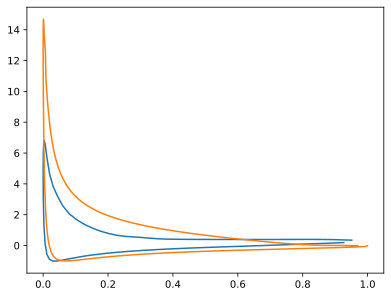

In [7]:
Cp_data = read_pack('Cp_new.txt')
plt.plot(Cp_data[:,0], -Cp_data[:,1])
plt.plot(x, -Cp)

In [8]:
print(round(np.cos(np.deg2rad(17.9)), 4))
print(round(np.sin(np.deg2rad(17.9)), 4))

0.9516
0.3074


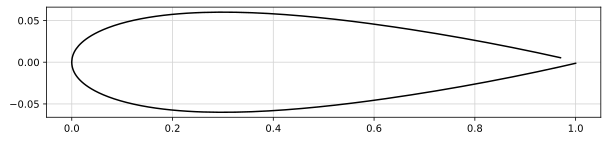

In [9]:
# Визуалицая профиля крыла

f = plt.figure(figsize=(10, 2))
plt.plot(x,y, color = 'black')
plt.grid(color = 'lightgray')
plt.show()

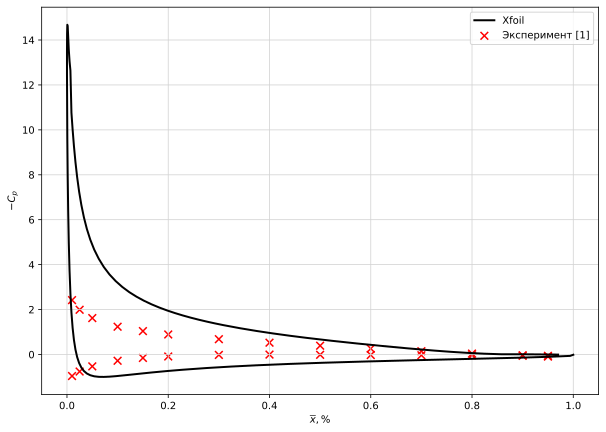

In [10]:
# График распределения коэффициента давления по профилю крыла
Cp_up_exp, Cp_dn_exp = EXP.get_Cp_experiment(AIRFOIL)

f = plt.figure(figsize=(10, 7))
plt.plot(x,-Cp, color = 'black', linewidth = 2, label = 'Xfoil')
plt.scatter(Cp_up_exp[:,0]/100, -Cp_up_exp[:,7], s = 60, color = 'red',marker = 'x', label = 'Эксперимент [1]')
plt.scatter(Cp_dn_exp[:,0]/100, -Cp_dn_exp[:,7], s = 60, color = 'red', marker = 'x')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.xlabel('$\overline {x}, \\%$')
plt.ylabel('$-C_p$')
plt.show()

In [11]:
# Расчет критического числа Маха

Cp_min = S.get_Cp_min(Cp) # расчет минимального коэффициента дваления
M_kr = S.get_M_kr(Cp_min, method = 'KHRISTIANOVICH') # расчет критического числа Маха по методу Христиановича
np.around(M_kr, 4)

0.1766

Text(0, 0.5, '$M_{кр}$')

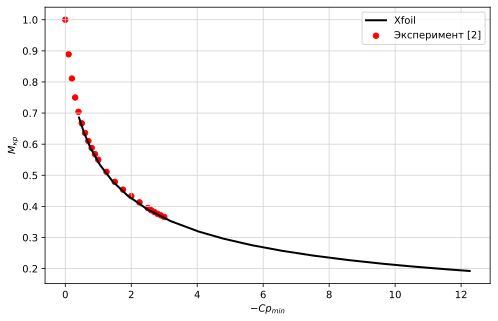

In [12]:
# Пример получения графика M_кр(Cp_min)
AIRFOIL = 'NACA0012' # Имя профиля (имя профиля или файл с координатами профиля)
Re = 1.7e6 # Число Рейнольдса
ITER = 70 # Число итераций
INIT_TYPE = 'alpha' # Инициализация расчета (по c_ya или alpha)
Value = 0.6 # Значение c_ya или alpha

alpha_array = np.linspace(-5,20, 26)
M_kr_plot, Cp_min_plot = np.array([]), np.array([])
for alf in alpha_array:
    Res_Cp = S.get_Cp_x(AIRFOIL, Re, ITER, INIT_TYPE, float(alf))
    x,y,Cp = Res_Cp['x'], Res_Cp['y'], Res_Cp['Cp']
    Cp_min = S.get_Cp_min(Cp)
    M_kr_plot = np.append(M_kr_plot, S.get_M_kr(Cp_min, 'KHRISTIANOVICH'))
    Cp_min_plot = np.append(Cp_min_plot, Cp_min)

# Импорт экспериментальных данных
Cp_min_exp, M_kr_exp = EXP.get_M_kr_Cp_values()['Cp_min'], EXP.get_M_kr_Cp_values()['M_kr']

# Построение графика M_кр(Cp_min)
f = plt.figure(figsize=(8, 5))
plt.plot(-np.array(Cp_min_plot), M_kr_plot, color = 'black', linewidth = 2, label = 'Xfoil')
plt.scatter(-Cp_min_exp, M_kr_exp, color = 'red', s = 30, label = 'Эксперимент [2]')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.xlabel('$-Cp_{min}$')
plt.ylabel('$M_{кр}$')

In [25]:
# Пример расчета АДХ профиля
AIRFOIL = 'NACA0012' # Имя профиля (имя профиля или файл с координатами профиля)
Re = 6e6 # Число Рейнольдса
ITER = 150 # Число итераций
INIT_TYPE_ADX = 'alpha' # Инициализация расчета (по c_ya или alpha)
value_min = 0 # Значение c_ya или alpha
value_max = 25
inc = 2

Res_ADX = S.get_ADX(AIRFOIL, Re, INIT_TYPE_ADX, value_min, value_max, inc, ITER)
alpha, c_ya, c_xa = Res_ADX['alpha'], Res_ADX['c_ya'], Res_ADX['c_xa']
print('alpha =', alpha[0])
print('c_ya = ', c_ya[0])
print('c_xa = ', c_xa[0])

alpha = 0.0
c_ya =  0.0
c_xa =  0.00508


In [26]:
# Пример получения графиков c_ya (alpha), c_xa (alpha), c_ya (с_xa)
Res_ADX = S.get_ADX(AIRFOIL, Re, INIT_TYPE_ADX, value_min, value_max, inc, ITER)
alpha, c_ya, c_xa = Res_ADX['alpha'], Res_ADX['c_ya'], Res_ADX['c_xa']

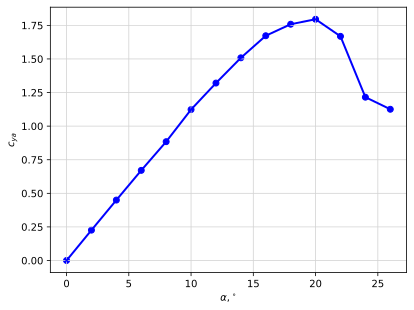

In [27]:
# График c_ya(alpha)
plt.plot(alpha, c_ya, lw = 2, color = 'blue')
plt.scatter(alpha, c_ya, color = 'blue')
plt.xlabel('$\\alpha, ^{\circ}$')
plt.ylabel('$c_{ya}$')
plt.grid(color = 'lightgray')
plt.show()

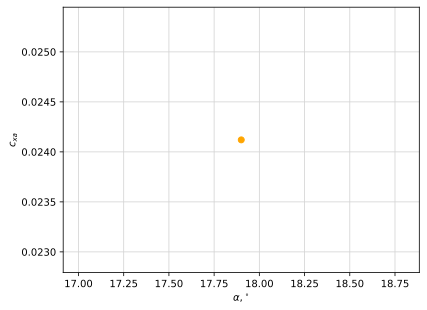

In [16]:
# График c_xa(alpha)
plt.plot(alpha, c_xa, lw = 2, color = 'orange')
plt.scatter(alpha, c_xa, color = 'orange')
plt.xlabel('$\\alpha, ^{\circ}$')
plt.ylabel('$c_{xa}$')
plt.grid(color = 'lightgray')
plt.show()

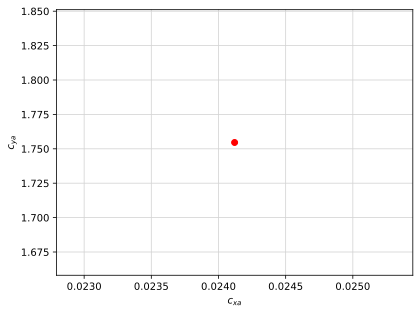

In [17]:
# График c_ya(c_xa)
plt.plot(c_xa, c_ya, lw = 2, color = 'red')
plt.scatter(c_xa, c_ya, color = 'red')
plt.xlabel('$c_{xa}$')
plt.ylabel('$c_{ya}$')
plt.grid(color = 'lightgray')
plt.show()

In [18]:
# Исправить:
# убрать лишние методы расчета критического числа Маха
# добавить варьирование профилей через словарь
# убрать результаты эксперимента

In [19]:
airfoils_dict = {'RAF 34 AIRFOIL.dat': ['''RAF 34 AIRFOIL
  1.000000  0.000000
  0.950000  0.006400
  0.900000  0.012600
  0.800000  0.027000
  0.700000  0.043100
  0.600000  0.058700
  0.500000  0.072100
  0.400000  0.080800
  0.300000  0.083200
  0.200000  0.077200
  0.150000  0.069700
  0.100000  0.058300
  0.075000  0.051200
  0.050000  0.041100
  0.025000  0.028200
  0.012500  0.019600
  0.000000  0.000000
  0.012500 -0.016200
  0.025000 -0.021400
  0.050000 -0.028100
  0.075000 -0.032500
  0.100000 -0.035300
  0.150000 -0.039100
  0.200000 -0.041600
  0.300000 -0.043200
  0.400000 -0.043200
  0.500000 -0.041100
  0.600000 -0.036900
  0.700000 -0.030900
  0.800000 -0.023000
  0.900000 -0.013400
  0.950000 -0.007600
  1.000000  0.000000'''],
  'NACA23021.dat' : ['''NACA 23021
  1.000000  0.002200
  0.950000  0.015300
  0.900000  0.027600
  0.800000  0.050500
  0.700000  0.070900
  0.600000  0.089000
  0.500000  0.104000
  0.400000  0.114900
  0.300000  0.120600
  0.250000  0.120500
  0.200000  0.118000
  0.150000  0.111900
  0.100000  0.100300
  0.075000  0.091300
  0.050000  0.079300
  0.025000  0.064100
  0.012500  0.048700
  0.000000  0.000000
  0.012500 -0.020800
  0.025000 -0.031400
  0.050000 -0.045200
  0.075000 -0.055500
  0.100000 -0.063200
  0.150000 -0.075100
  0.200000 -0.083000
  0.250000 -0.087600
  0.300000 -0.089500
  0.400000 -0.088300
  0.500000 -0.081400
  0.600000 -0.070700
  0.700000 -0.057200
  0.800000 -0.041300
  0.900000 -0.023000
  0.950000 -0.013000
  1.000000 -0.002200'''],
  'CLARK Y AIRFOIL.dat': ['''CLARK Y AIRFOIL
    1.000000  0.000599
    0.990000  0.002969
    0.980000  0.005333
    0.970000  0.007687
    0.960000  0.010023
    0.940000  0.014624
    0.920000  0.019116
    0.900000  0.023502
    0.880000  0.027789
    0.860000  0.031974
    0.840000  0.036054
    0.820000  0.040024
    0.800000  0.043884
    0.780000  0.047628
    0.760000  0.051257
    0.740000  0.054767
    0.720000  0.058160
    0.700000  0.061433
    0.680000  0.064584
    0.660000  0.067605
    0.640000  0.070482
    0.620000  0.073206
    0.600000  0.075763
    0.580000  0.078145
    0.560000  0.080348
    0.540000  0.082371
    0.520000  0.084214
    0.500000  0.085877
    0.480000  0.087357
    0.460000  0.088643
    0.440000  0.089718
    0.420000  0.090566
    0.400000  0.091171
    0.380000  0.091521
    0.360000  0.091627
    0.340000  0.091508
    0.320000  0.091186
    0.300000  0.090680
    0.280000  0.090002
    0.260000  0.089084
    0.240000  0.087831
    0.220000  0.086143
    0.200000  0.083920
    0.180000  0.081069
    0.160000  0.077571
    0.140000  0.073436
    0.120000  0.068620
    0.100000  0.062998
    0.080000  0.056431
    0.060000  0.048757
    0.050000  0.044275
    0.040000  0.039128
    0.030000  0.033022
    0.020000  0.025374
    0.012000  0.017858
    0.008000  0.013735
    0.004000  0.008924
    0.002000  0.005803
    0.001000  0.003727
    0.000500  0.002339
    0.000000  0.000000
    0.000500 -0.004670
    0.001000 -0.005942
    0.002000 -0.007811
    0.004000 -0.010513
    0.008000 -0.014286
    0.012000 -0.016973
    0.020000 -0.020272
    0.030000 -0.022606
    0.040000 -0.024521
    0.050000 -0.026045
    0.060000 -0.027128
    0.080000 -0.028459
    0.100000 -0.029379
    0.120000 -0.029963
    0.140000 -0.030240
    0.160000 -0.030255
    0.180000 -0.030049
    0.200000 -0.029666
    0.220000 -0.029145
    0.240000 -0.028518
    0.260000 -0.027816
    0.280000 -0.027070
    0.300000 -0.026308
    0.320000 -0.025556
    0.340000 -0.024818
    0.360000 -0.024087
    0.380000 -0.023361
    0.400000 -0.022634
    0.420000 -0.021904
    0.440000 -0.021171
    0.460000 -0.020435
    0.480000 -0.019699
    0.500000 -0.018962
    0.520000 -0.018226
    0.540000 -0.017491
    0.560000 -0.016757
    0.580000 -0.016023
    0.600000 -0.015289
    0.620000 -0.014555
    0.640000 -0.013821
    0.660000 -0.013086
    0.680000 -0.012351
    0.700000 -0.011617
    0.720000 -0.010882
    0.740000 -0.010148
    0.760000 -0.009413
    0.780000 -0.008679
    0.800000 -0.007944
    0.820000 -0.007210
    0.840000 -0.006475
    0.860000 -0.005741
    0.880000 -0.005006
    0.900000 -0.004272
    0.920000 -0.003537
    0.940000 -0.002803
    0.960000 -0.002068
    0.970000 -0.001701
    0.980000 -0.001334
    0.990000 -0.000967
    1.000000 -0.000599'''],
    'AG03.txt':'''AG03
  1.000000  0.000662
  0.994875  0.001210
  0.984975  0.002247
  0.973308  0.003426
  0.960939  0.004647
  0.948370  0.005887
  0.935754  0.007140
  0.923123  0.008397
  0.910487  0.009656
  0.897855  0.010913
  0.885230  0.012166
  0.872612  0.013411
  0.860000  0.014647
  0.847391  0.015874
  0.834786  0.017089
  0.822181  0.018292
  0.809577  0.019483
  0.796974  0.020660
  0.784368  0.021824
  0.771761  0.022975
  0.759154  0.024113
  0.746543  0.025238
  0.733929  0.026350
  0.721314  0.027451
  0.708699  0.028539
  0.696083  0.029615
  0.683469  0.030677
  0.670857  0.031725
  0.658247  0.032758
  0.645638  0.033774
  0.633032  0.034775
  0.620429  0.035756
  0.607827  0.036720
  0.595228  0.037664
  0.582632  0.038586
  0.570039  0.039488
  0.557449  0.040365
  0.544862  0.041218
  0.532277  0.042044
  0.519696  0.042844
  0.507117  0.043615
  0.494542  0.044357
  0.481970  0.045070
  0.469399  0.045748
  0.456832  0.046394
  0.444268  0.047005
  0.431705  0.047581
  0.419146  0.048121
  0.406590  0.048623
  0.394038  0.049085
  0.381491  0.049506
  0.368949  0.049886
  0.356413  0.050221
  0.343886  0.050509
  0.331366  0.050751
  0.318857  0.050940
  0.306358  0.051075
  0.293873  0.051154
  0.281401  0.051173
  0.268946  0.051128
  0.256511  0.051015
  0.244096  0.050830
  0.231706  0.050567
  0.219345  0.050221
  0.207014  0.049788
  0.194722  0.049257
  0.182473  0.048624
  0.170275  0.047879
  0.158135  0.047014
  0.146065  0.046016
  0.134077  0.044875
  0.122188  0.043576
  0.110415  0.042107
  0.098787  0.040447
  0.087333  0.038582
  0.076099  0.036490
  0.065141  0.034148
  0.054543  0.031546
  0.044438  0.028679
  0.035054  0.025580
  0.026726  0.022341
  0.019796  0.019132
  0.014399  0.016153
  0.010376  0.013518
  0.007410  0.011228
  0.005217  0.009239
  0.003584  0.007497
  0.002364  0.005957
  0.001461  0.004586
  0.000804  0.003348
  0.000336  0.002171
  0.000057  0.001038
  0.000003 -0.000144
  0.000295 -0.001237
  0.001304 -0.002345
  0.002832 -0.003392
  0.005146 -0.004550
  0.008148 -0.005700
  0.012068 -0.006869
  0.017309 -0.008078
  0.024142 -0.009278
  0.032772 -0.010396
  0.042956 -0.011344
  0.053780 -0.012046
  0.065071 -0.012544
  0.076714 -0.012880
  0.088600 -0.013076
  0.100661 -0.013162
  0.112851 -0.013163
  0.125133 -0.013101
  0.137483 -0.012991
  0.149888 -0.012852
  0.162339 -0.012699
  0.174831 -0.012533
  0.187362 -0.012358
  0.199929 -0.012175
  0.212527 -0.011993
  0.225155 -0.011809
  0.237803 -0.011625
  0.250473 -0.011441
  0.263159 -0.011256
  0.275856 -0.011072
  0.288560 -0.010887
  0.301265 -0.010703
  0.313969 -0.010518
  0.326666 -0.010333
  0.339358 -0.010149
  0.352044 -0.009965
  0.364727 -0.009780
  0.377405 -0.009596
  0.390079 -0.009412
  0.402750 -0.009228
  0.415417 -0.009043
  0.428079 -0.008860
  0.440739 -0.008676
  0.453397 -0.008492
  0.466057 -0.008308
  0.478721 -0.008123
  0.491390 -0.007940
  0.504060 -0.007755
  0.516731 -0.007571
  0.529400 -0.007387
  0.542065 -0.007204
  0.554732 -0.007019
  0.567398 -0.006835
  0.580063 -0.006651
  0.592727 -0.006467
  0.605391 -0.006283
  0.618056 -0.006099
  0.630721 -0.005915
  0.643385 -0.005730
  0.656047 -0.005547
  0.668712 -0.005363
  0.681376 -0.005179
  0.694041 -0.004994
  0.706707 -0.004810
  0.719375 -0.004627
  0.732044 -0.004442
  0.744714 -0.004258
  0.757385 -0.004074
  0.770058 -0.003890
  0.782733 -0.003706
  0.795412 -0.003522
  0.808092 -0.003337
  0.820775 -0.003154
  0.833464 -0.002968
  0.846158 -0.002784
  0.858858 -0.002599
  0.871564 -0.002415
  0.884274 -0.002230
  0.896980 -0.002045
  0.909681 -0.001860
  0.922381 -0.001677
  0.935082 -0.001492
  0.947777 -0.001308
  0.960437 -0.001123
  0.972932 -0.000942
  0.984788 -0.000769
  0.994831 -0.000624
  1.000000 -0.000548'''}

    
def write_airfoilscoord_to_file(airfoils_coords):
    for name in airfoils_dict.keys():
        input_file = open(f"{name}", 'w')
        input_file.write(airfoils_dict[name][0])
        input_file.close()

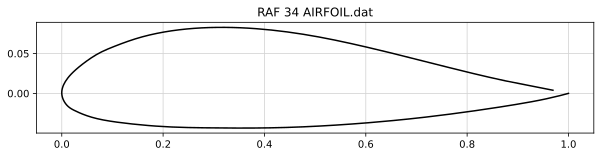

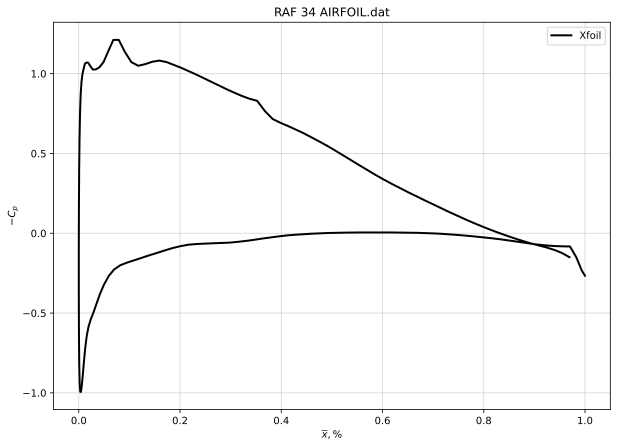

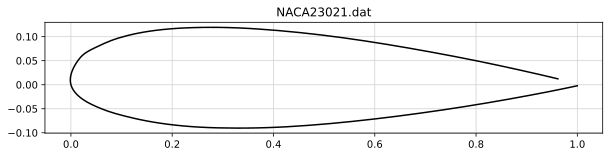

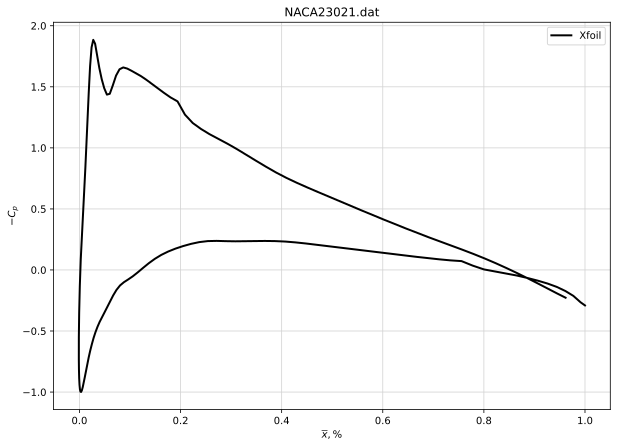

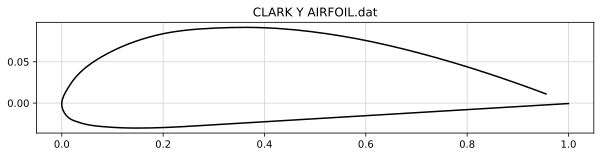

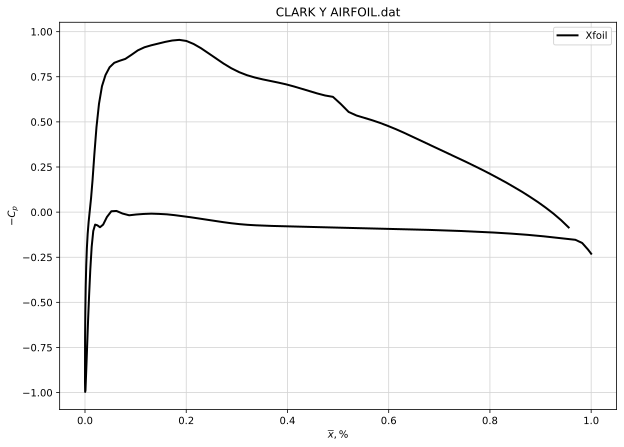

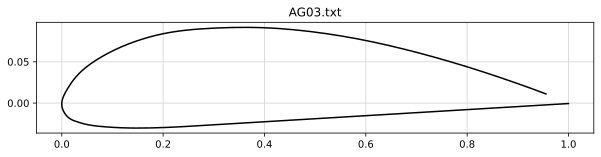

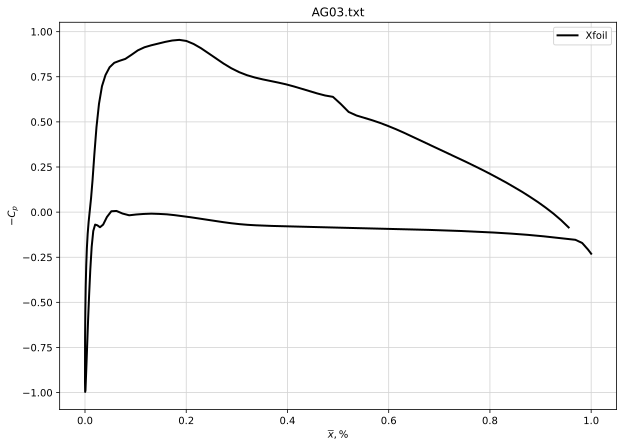

In [20]:
write_airfoilscoord_to_file(airfoils_dict)

AIRFOIL = 'NACA0012' # Имя профиля (имя профиля или файл с координатами профиля)
Re = 1.7e6 # Число Рейнольдса
ITER = 70 # Число итераций
INIT_TYPE = 'Cl' # Инициализация расчета (по c_ya или alpha)
Value = 0.6 # Значение c_ya или alpha

for i in airfoils_dict.keys():
    Res_xyCp = S.get_Cp_x(i, Re, ITER, INIT_TYPE, Value)
    x,y,Cp = Res_xyCp['x'], Res_xyCp['y'], Res_xyCp['Cp']
    
    f = plt.figure(figsize=(10, 2))
    plt.plot(x,y, color = 'black')
    plt.grid(color = 'lightgray')
    plt.title(i)
    plt.show()

    f = plt.figure(figsize=(10, 7))
    plt.title(i)
    plt.plot(x,-Cp, color = 'black', linewidth = 2, label = 'Xfoil')
    plt.legend(loc = 'best')
    plt.grid(color = 'lightgray')
    plt.xlabel('$\overline {x}, \\%$')
    plt.ylabel('$-C_p$')
    plt.show()